In [1]:

# Import the necessary libraries
import sqlalchemy
#!pip install pymysql
import pymysql
import pandas as pd
#!pip install yfinance
import yfinance
import warnings
#!pip install mysql-connector-python
#!sudo service mysql start
warnings.filterwarnings("ignore")

In [2]:

# Create a function to create a schema in the MySQL database for each index you want to use in the system.
import mysql.connector

def schemacreator(index):
    # Establishing a connection
    mydb = mysql.connector.connect(
        host="localhost",
        user="root",
        password="Ngetich30"
    )
    # Creating a cursor
    mycursor = mydb.cursor()

    # Creating the schema
    mycursor.execute(f"DROP SCHEMA IF EXISTS {index}")

    # Creating a cursor
    mycursor = mydb.cursor()

    # Creating the schema
    mycursor.execute(f"CREATE SCHEMA IF NOT EXISTS {index}")

    # Closing the cursor and connection
    mycursor.close()
    mydb.close()
schemacreator('my_index')

In [3]:

# Define the indices you want to use in the system.

indices = ['Nasdaq']

# Use the "pd.read_html" function to scrape the Wikipedia page of the index you want to use and store it in a pandas DataFrame.

nasdaq = pd.read_html('https://en.wikipedia.org/wiki/Nasdaq-100')[4]

In [4]:

# Filter for semiconductor companies in the Consumer Electronics sector
nasdaq = nasdaq[(nasdaq['GICS Sub-Industry'] == 'Semiconductors')].Ticker.to_list()
print(nasdaq)

['AMD', 'ADI', 'AVGO', 'GFS', 'INTC', 'MCHP', 'MU', 'NVDA', 'NXPI', 'QCOM', 'TXN']


In [5]:

# Connect to the MySQL database and use the yfinance library to download the historical stock price data for each ticker, between the specified start and end dates.

# Establishing a connection
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Ngetich30",
  database="my_index"
)

for symbol in nasdaq:
    mycursor = mydb.cursor()
    mycursor.execute("SELECT COUNT(*) FROM information_schema.tables WHERE table_name = %s", (symbol,))
    table_exists = mycursor.fetchone()[0]
    if table_exists > 1:
        print("Tables Exist")
    else:
        cursor = mydb.cursor()
        cursor.execute(f"CREATE TABLE {symbol} (date DATE, open FLOAT, high FLOAT, low FLOAT, close FLOAT, adj_close FLOAT, volume BIGINT)")
    df = yfinance.download(symbol,start='2018-01-01',end='2022-01-01')
    df = df.reset_index()
    cursor = mydb.cursor()
    cursor.execute(f"TRUNCATE TABLE {symbol}")
    for i, row in df.iterrows():
        cursor = mydb.cursor()
        sql = f"INSERT INTO {symbol} (date, open, high, low, close, adj_close, volume) VALUES (%s, %s, %s, %s, %s, %s, %s)"
        val = tuple(row)
        cursor.execute(sql, val)
    mydb.commit()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
# Define a function to retrieve the historical stock price data for a specific ticker from the MySQL database.
def get_data_from_database(ticker):
    cursor = mydb.cursor()
    cursor.execute(f"SELECT * FROM {ticker}")
    rows = cursor.fetchall()
    columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
    data = pd.DataFrame(rows, columns=columns)
    data.set_index('Date', inplace=True)
    return data

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get data for companies to perform EDA
avgo = get_data_from_database('AVGO')
nvda = get_data_from_database('NVDA')
nxpi = get_data_from_database('NXPI')
qcom = get_data_from_database('QCOM')
txn =  get_data_from_database('TXN')

#Exploratory Data Analysis
Use *head()* to view the first few rows of data, and *info()* to get information about the data types and number of non-null values for each column.

In [8]:

print('AVGO')
avgo.head()

AVGO


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,259.77,267.50,257.57,267.01,219.429,3313500
2018-01-03,267.29,270.73,266.03,269.93,221.829,3116100
2018-01-04,271.59,271.76,268.43,270.02,221.903,1906700
2018-01-05,271.97,274.26,269.45,271.62,223.218,2863300
2018-01-08,270.92,272.55,269.06,272.27,223.752,2097100


In [9]:
print('NVDA')
nvda.head()

NVDA


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,48.9450,49.8750,48.6250,49.8375,49.3263,35561600
2018-01-03,51.0250,53.4250,50.9375,53.1175,52.5727,91470400
2018-01-04,53.9400,54.5125,53.1725,53.3975,52.8498,58326800
2018-01-05,53.5475,54.2275,52.7700,53.8500,53.2976,58012400
2018-01-08,55.1000,56.2500,54.6450,55.5000,54.9307,88121600


In [10]:
print('NXPI')
nxpi.head()

NXPI


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,117.00,117.98,116.80,117.95,110.237,1784200
2018-01-03,118.35,118.53,117.68,118.08,110.359,2873200
2018-01-04,118.09,118.33,117.66,117.87,110.162,2153500
2018-01-05,118.09,118.31,117.91,118.05,110.331,1631700
2018-01-08,118.65,118.65,117.95,118.28,110.546,1258000


In [11]:
print('QCOM')
qcom.head()

QCOM


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,64.38,65.33,64.17,65.20,56.3377,6329600
2018-01-03,65.22,66.06,64.69,65.94,56.9772,6844200
2018-01-04,66.18,66.53,65.91,66.03,57.0550,5060100
2018-01-05,66.04,66.60,65.50,66.47,57.4351,5421800
2018-01-08,66.25,66.53,65.94,66.27,57.2623,4266900


In [12]:
print('TXN')
txn.head()

TXN


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,105.11,105.62,104.50,105.57,91.0305,4236200
2018-01-03,105.88,108.51,105.60,108.43,93.4966,6918900
2018-01-04,108.48,109.21,108.05,108.29,93.3759,5460400
2018-01-05,108.70,109.23,108.29,109.12,94.0916,5254900
2018-01-08,108.55,110.37,108.41,109.64,94.5400,4549400


Check for any missing values using the *isnull()* and *sum()* methods

In [13]:
print('AVGO: ')
avgo.isnull().sum()

AVGO: 


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
print('NVDA: ')
nvda.isnull().sum()

NVDA: 


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
print('NXPI: ')
nxpi.isnull().sum()

NXPI: 


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [16]:
print('QCOM: ')
qcom.isnull().sum()

QCOM: 


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [17]:
print('TXN: ')
txn.isnull().sum()

TXN: 


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Generate summary statistics of the numerical columns using the *describe()* method.

In [18]:
print('AVGO: ')
avgo.describe()

AVGO: 


,Open,High,Low,Close,Adj Close,Volume
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03
mean,335.729504,339.745556,331.638889,335.862153,303.698346,2.773911e+06
std,103.547865,104.238629,102.819160,103.752375,107.560854,2.135869e+06
min,167.640000,187.480000,155.670000,167.870000,149.970000,4.123000e+05
25%,256.585000,260.750000,252.537500,255.787500,218.076750,1.661725e+06
50%,301.225000,304.520000,298.445000,301.460000,263.888500,2.261900e+06
75%,429.440000,435.872500,425.220000,430.815000,403.158250,3.190050e+06
max,677.550000,677.760000,669.120000,674.280000,648.602000,4.350830e+07


In [19]:
print('NVDA: ')
nvda.describe()

NVDA: 


,Open,High,Low,Close,Adj Close,Volume
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03
mean,98.999111,100.664086,97.198672,99.007990,98.682930,4.611583e+07
std,67.929799,69.179343,66.446515,67.862371,67.877674,2.388230e+07
min,31.622500,32.495000,31.115000,31.770000,31.531900,9.788400e+06
25%,50.999375,52.316875,49.888750,51.346875,50.963900,2.924802e+07
50%,65.116250,65.955000,64.118750,65.435000,64.981600,4.023660e+07
75%,134.197250,135.968500,131.816250,133.915000,133.612750,5.807880e+07
max,335.170000,346.470000,320.360000,333.760000,333.351000,2.511528e+08


In [20]:
print('NXPI: ')
nxpi.describe()

NXPI: 


,Open,High,Low,Close,Adj Close,Volume
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03
mean,131.379127,133.138026,129.430109,131.298512,125.410704,3.921776e+06
std,44.372889,44.843371,43.816213,44.419363,44.078803,3.907531e+06
min,64.830000,70.500000,58.410000,64.560000,61.662400,4.805000e+05
25%,97.530000,98.775000,96.097500,97.650000,92.065450,2.076275e+06
50%,116.890000,118.400000,115.510000,116.855000,110.466500,2.937600e+06
75%,163.030000,165.872500,159.270000,162.527500,156.552500,4.394375e+06
max,233.810000,239.910000,229.900000,238.900000,232.202000,5.310220e+07


In [21]:
print('QCOM: ')
qcom.describe()

QCOM: 


,Open,High,Low,Close,Adj Close,Volume
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03
mean,95.273651,96.527837,94.033145,95.272063,89.206606,1.134727e+07
std,36.769767,37.219040,36.279434,36.752192,37.150290,8.323910e+06
min,49.520000,49.800000,48.560000,49.400000,43.356800,2.120200e+06
25%,65.147500,66.050000,64.442500,65.222500,57.129100,7.087225e+06
50%,80.520000,81.995000,79.450000,80.570000,75.046000,9.446250e+06
75%,131.767500,133.245000,130.087500,131.645000,126.623000,1.305178e+07
max,190.300000,192.680000,184.560000,189.280000,184.154000,1.560193e+08


In [22]:
print('TXN: ')
txn.describe()

TXN: 


,Open,High,Low,Close,Adj Close,Volume
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03
mean,134.990317,136.429444,133.507956,135.027361,123.873622,5.081334e+06
std,32.994596,33.077301,32.756241,32.973134,34.050549,2.420857e+06
min,88.800000,90.550000,87.700000,87.800000,77.672400,1.044400e+06
25%,109.442500,110.722500,108.285000,109.640000,96.392150,3.526475e+06
50%,122.085000,123.530000,120.635000,121.910000,110.750000,4.554750e+06
75%,164.650000,166.760000,162.032500,163.635000,153.620000,5.818850e+06
max,201.550000,202.260000,199.060000,201.290000,191.704000,2.512170e+07


# Helper Functions for plotting data

In [23]:
# Define functions for plotting data
def plot_lines(data):
  data.plot(y='Open')
  plt.title('Open Prices over Time')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.show()

In [24]:
def visualize_col_relationships(data):
  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
  data.plot(y='Open', ax=axes[0,0])
  data.plot(y='Close', ax=axes[0,1])
  data.plot(y='Volume', ax=axes[1,0])
  data.plot(y='Adj Close', ax=axes[1,1])
  plt.show()

  data.plot(kind='scatter', x='Volume', y='Adj Close')
  plt.title('Adj Close Prices vs. Volume')
  plt.show()


In [25]:
def summary_stats(data):
  # Calculate the mean closing price for each year
  # extract year from 'Date' column
  data.index = pd.to_datetime(data.index)
  data['Year'] = data.index.year
  mean_close_by_year = data.groupby('Year')['Close'].mean()
  print(mean_close_by_year)

  # Calculate the daily price change
  data['Price_Change'] = data['Close'] - data['Open']
  return mean_close_by_year

In [26]:
def plot_trends(data, mcby):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

  # Plot mean closing price by year
  mcby.plot(ax=axes[0])
  axes[0].set_xlabel('Year')
  axes[0].set_ylabel('Mean Closing Price')
  axes[0].set_title('Mean Closing Price by Year')

  # Plot daily price change
  data['Date'] = pd.to_datetime(data.index)
  data.plot(x='Date', y='Price_Change', ax=axes[1])
  axes[1].set_xlabel('Date')
  axes[1].set_ylabel('Price Change')
  axes[1].set_title('Daily Price Change')

  plt.tight_layout()
  plt.show()

# Create Plots
*ticker*: **AVGO**

Create line plots of the various columns over time. Use the *plot()* method of the dataframe.

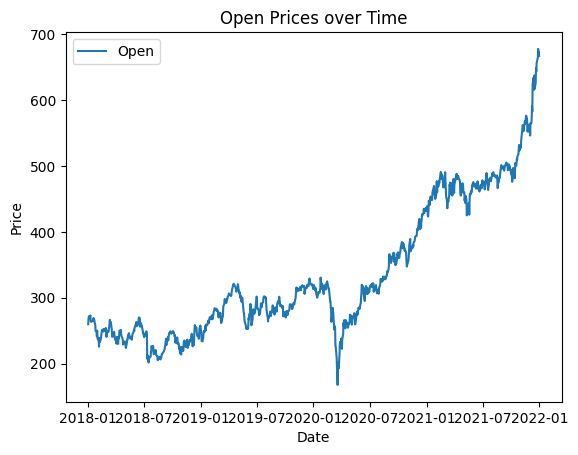

In [27]:
plot_lines(avgo)

create subplots and scatter plots to visualize relationships between columns.

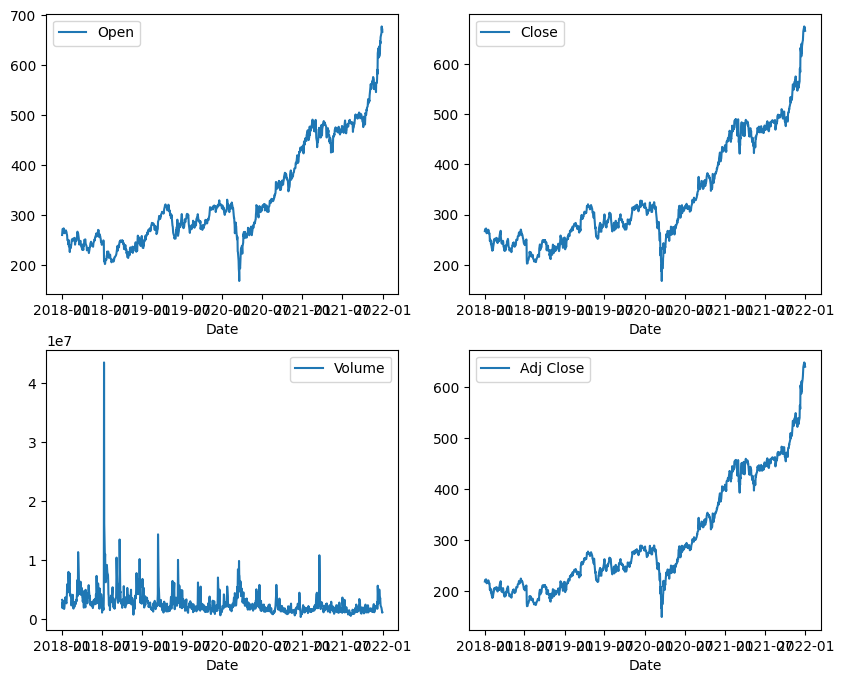

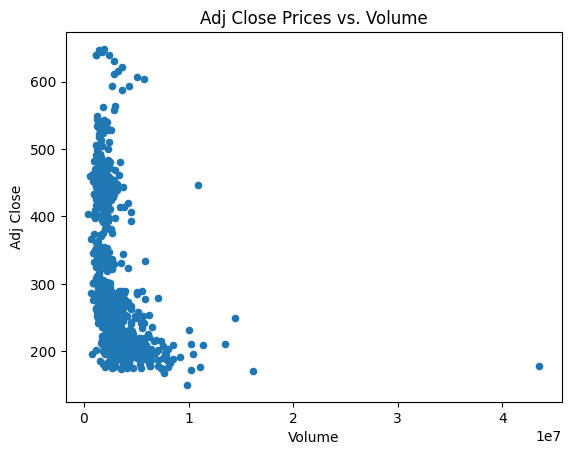

In [28]:
visualize_col_relationships(avgo)

Calculate summary statistics for specific time periods and create new columns based on calculations using the existing columns.

In [29]:
mcby = summary_stats(avgo)

Year
2018    239.213904
2019    287.797976
2020    322.075573
2021    494.032341
Name: Close, dtype: float64


Plot the data to provide some insight into the trends and fluctuations in the closing price and daily price change over time.

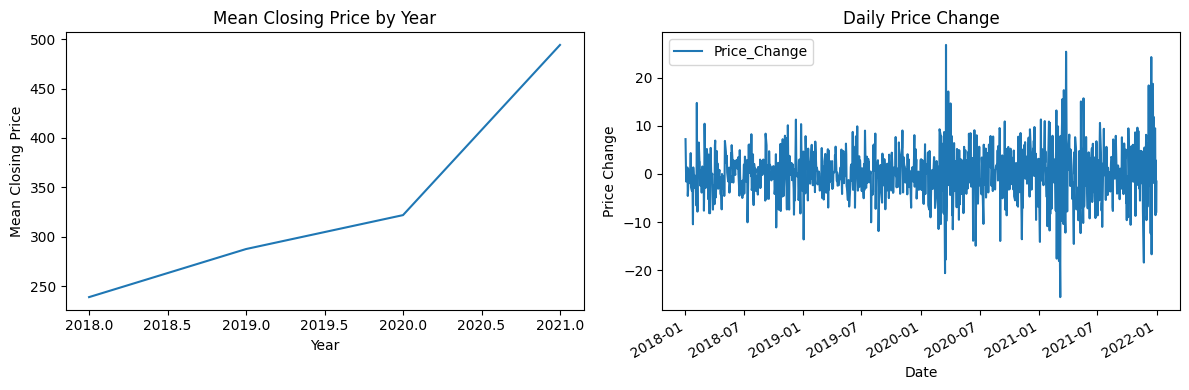

In [30]:
plot_trends(avgo, mcby)

*ticker*: **NVDA**

Create line plots of the various columns over time. Use the *plot()* method of the dataframe.

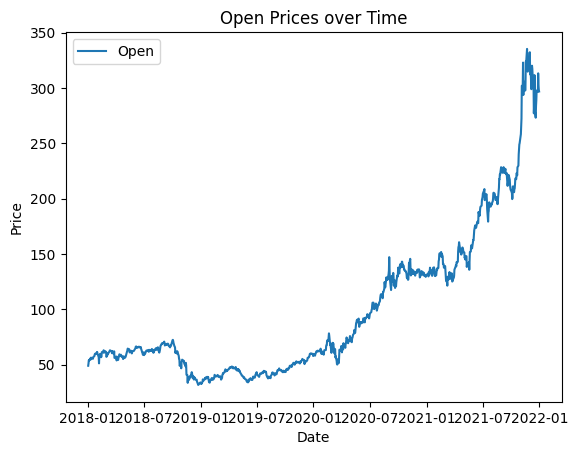

In [31]:
plot_lines(nvda)

create subplots and scatter plots to visualize relationships between columns.

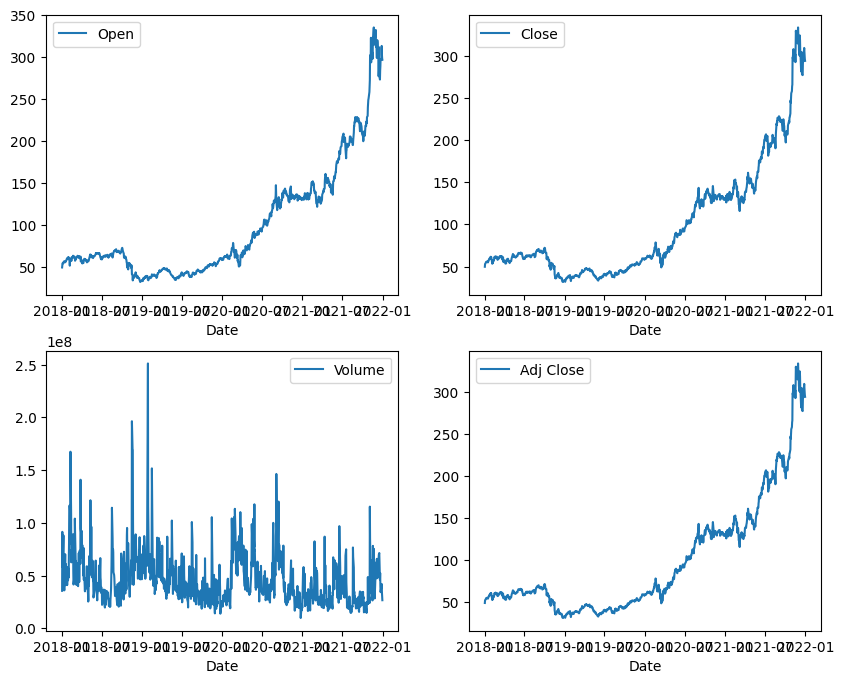

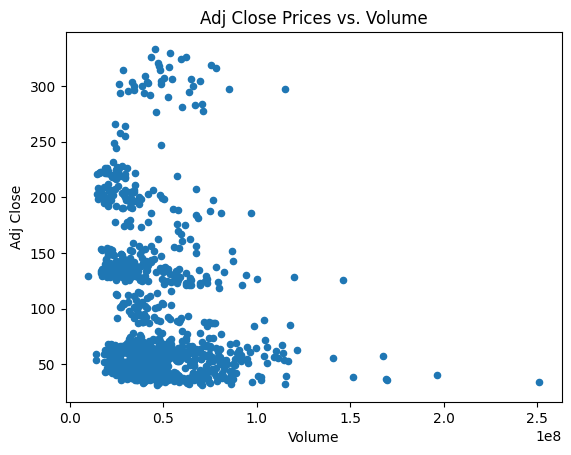

In [32]:
visualize_col_relationships(nvda)

Calculate summary statistics for specific time periods and create new columns based on calculations using the existing columns.

In [33]:
mcby = summary_stats(nvda)

Year
2018     58.096036
2019     43.646925
2020     98.907095
2021    195.219956
Name: Close, dtype: float64


Plot the data to provide some insight into the trends and fluctuations in the closing price and daily price change over time.

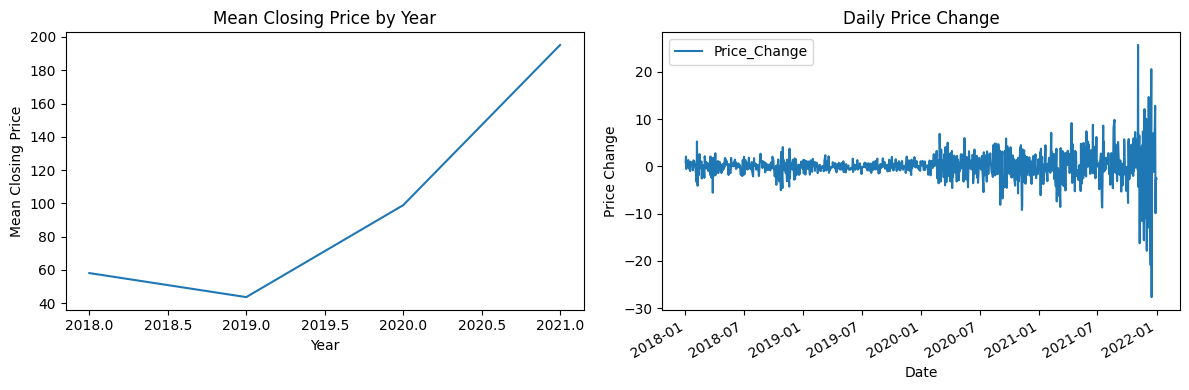

In [34]:
plot_trends(nvda, mcby)

*ticker*: **NXPI**

Create line plots of the various columns over time. Use the *plot()* method of the dataframe.

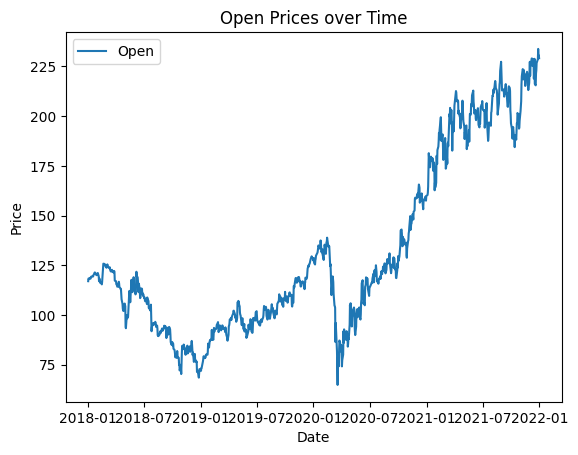

In [35]:
plot_lines(nxpi)

create subplots and scatter plots to visualize relationships between columns.

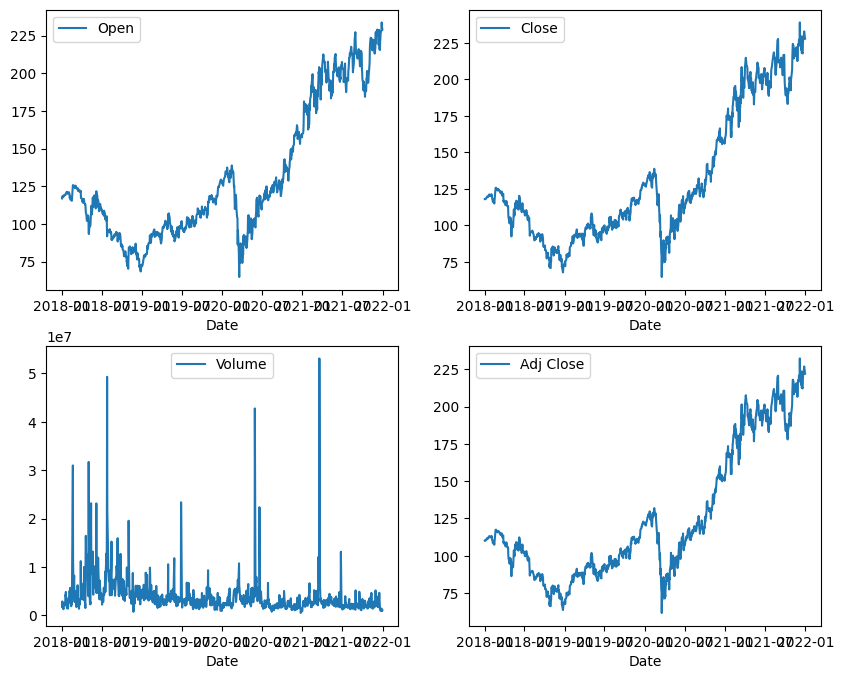

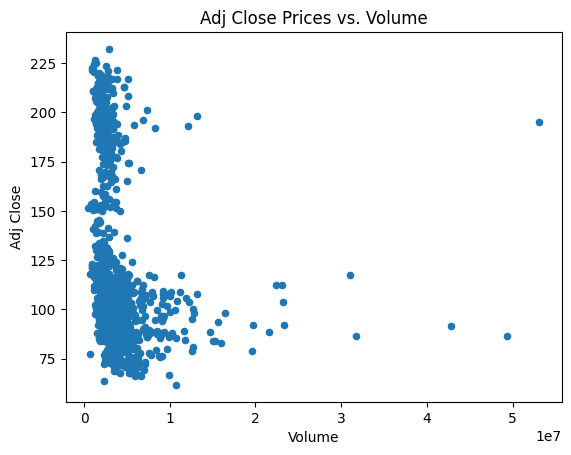

In [36]:
visualize_col_relationships(nxpi)

Calculate summary statistics for specific time periods and create new columns based on calculations using the existing columns.

In [37]:
mcby = summary_stats(nxpi)

Year
2018    101.384502
2019    100.905754
2020    121.770040
2021    201.052857
Name: Close, dtype: float64


Plot the data to provide some insight into the trends and fluctuations in the closing price and daily price change over time.

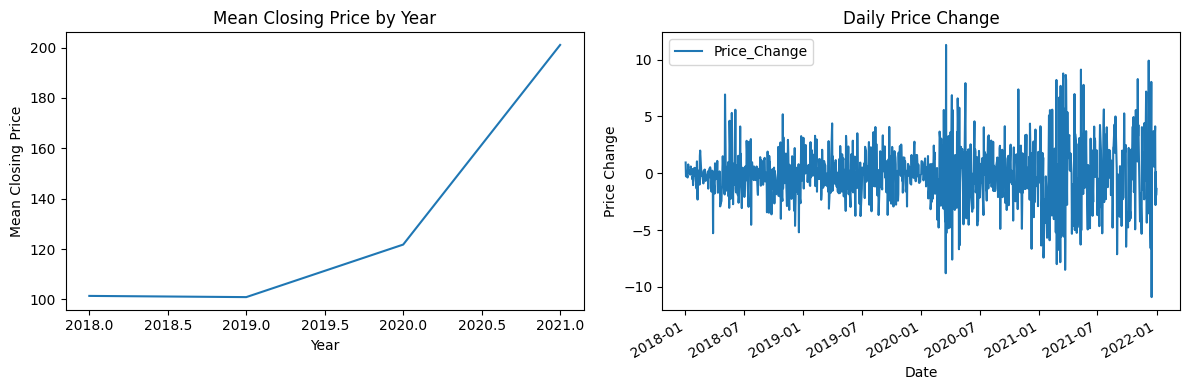

In [38]:
plot_trends(nxpi, mcby)

*ticker*: **QCOM**

Create line plots of the various columns over time. Use the *plot()* method of the dataframe.

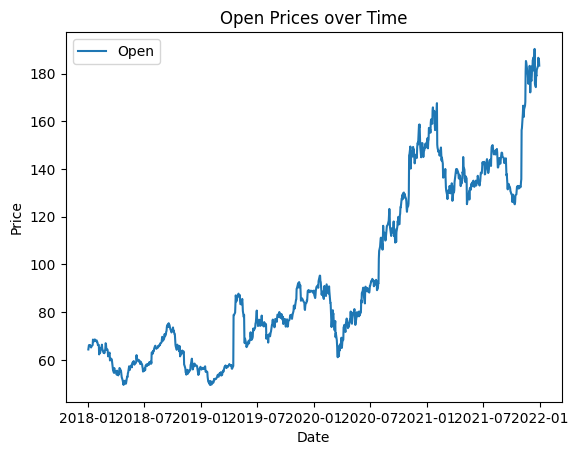

In [39]:
plot_lines(qcom)

create subplots and scatter plots to visualize relationships between columns.

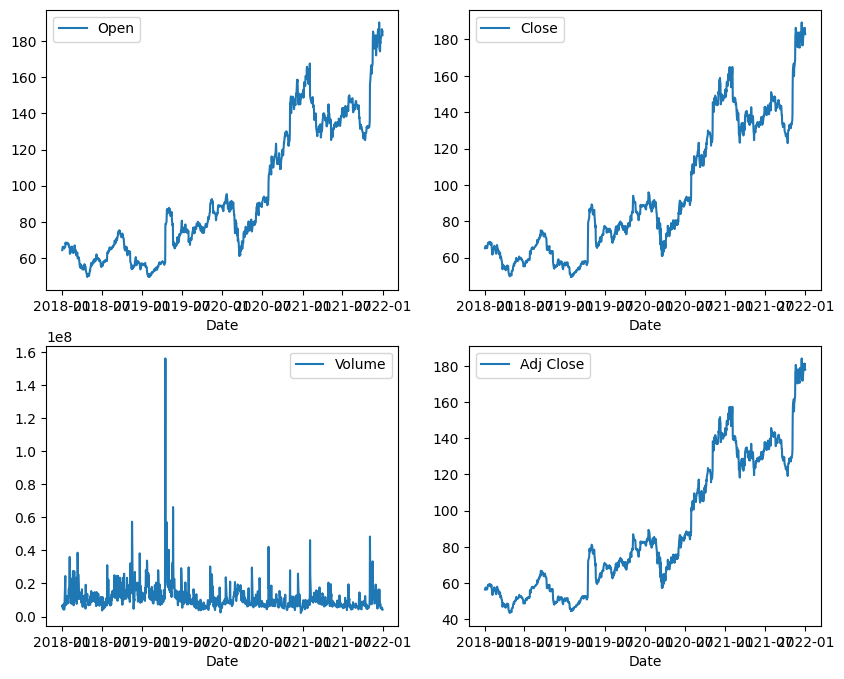

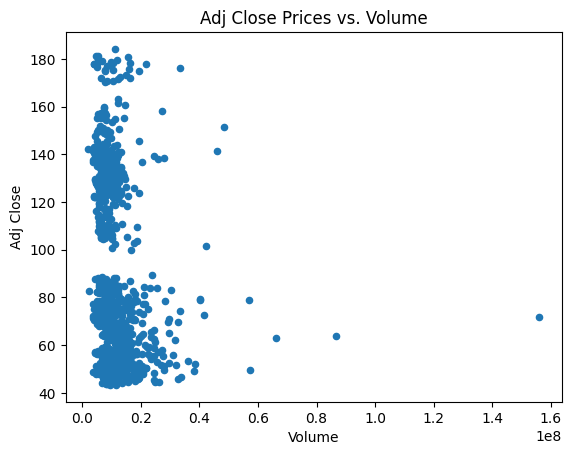

In [40]:
visualize_col_relationships(qcom)

Calculate summary statistics for specific time periods and create new columns based on calculations using the existing columns.

In [41]:
mcby = summary_stats(qcom)

Year
2018     61.476614
2019     71.737302
2020    102.312095
2021    145.400198
Name: Close, dtype: float64


Plot the data to provide some insight into the trends and fluctuations in the closing price and daily price change over time.

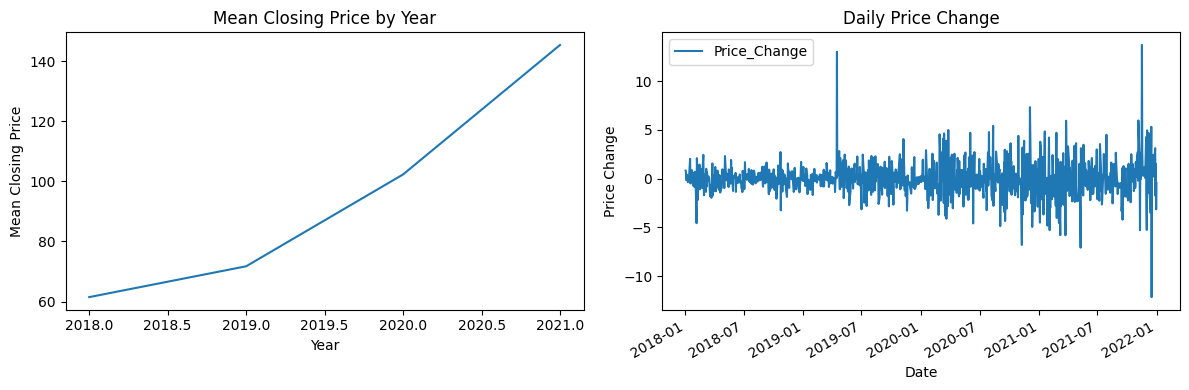

In [42]:
plot_trends(qcom, mcby)

*ticker*: **TXN**

Create line plots of the various columns over time. Use the *plot()* method of the dataframe.

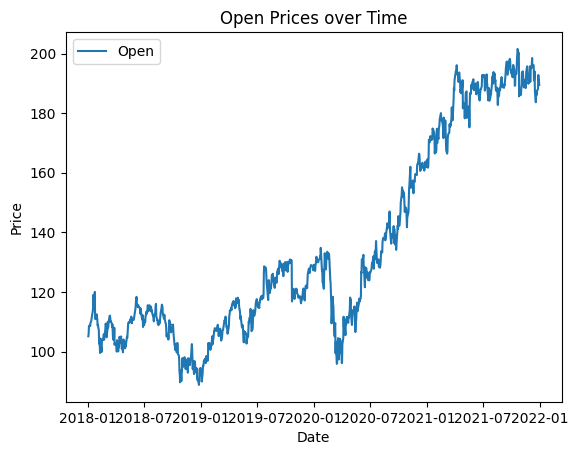

In [43]:
plot_lines(txn)

create subplots and scatter plots to visualize relationships between columns.

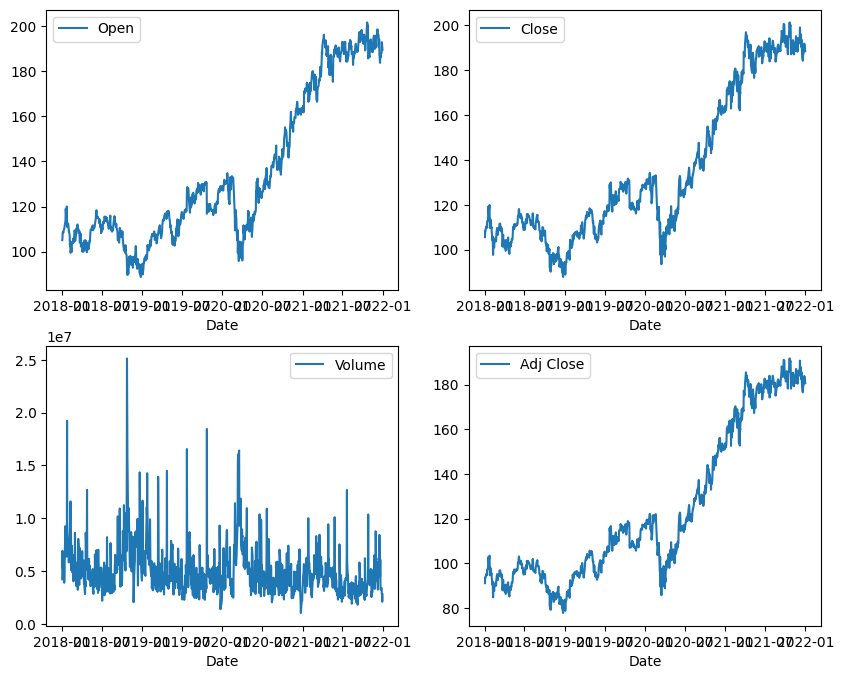

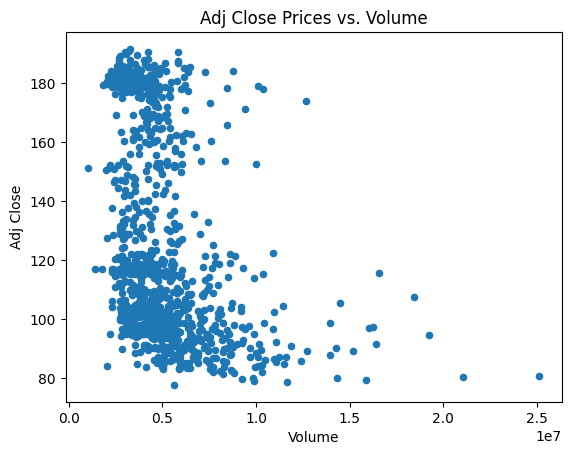

In [44]:
visualize_col_relationships(txn)

Calculate summary statistics for specific time periods and create new columns based on calculations using the existing columns.

In [45]:
mcby = summary_stats(txn)

Year
2018    106.114781
2019    115.665913
2020    132.161462
2021    186.063929
Name: Close, dtype: float64


Plot the data to provide some insight into the trends and fluctuations in the closing price and daily price change over time.

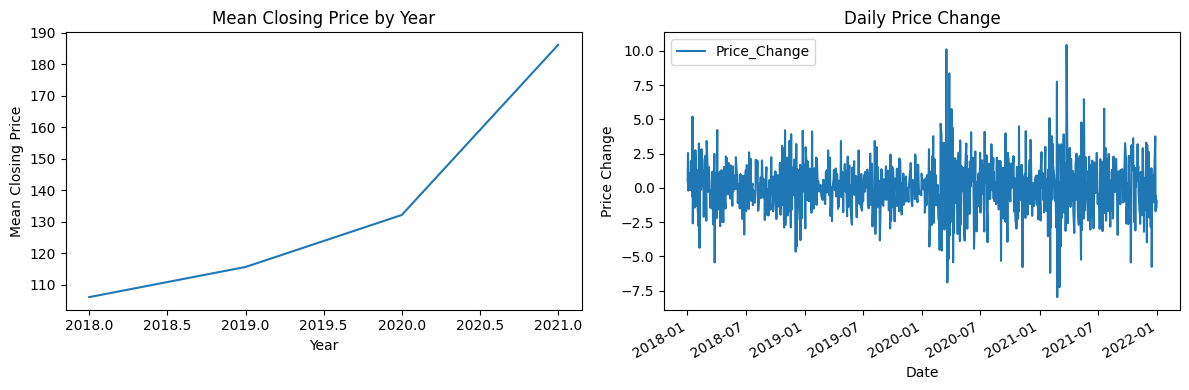

In [46]:
plot_trends(txn, mcby)


#Recommendation System
Function definition to calculate the moving average of a ticker.

In [47]:

# Define a function to generate a recommendation based on the MACD, RSI, and moving average of a stock 

def moving_average(ticker, window):
    data = get_data_from_database(ticker)
    ma = data['Close'].rolling(window=window).mean()
    return ma

Function definition for calculating the Relative Strength Index (RSI) for a given stock ticker and a specified window size.

In [48]:

def rsi(ticker, window):
    data = get_data_from_database(ticker)
    delta = data['Close'].diff()
    gains = delta.where(delta > 0, 0)
    losses = -delta.where(delta < 0, 0)
    avg_gain = gains.rolling(window=window).mean()
    avg_loss = losses.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1+ rs))
    return rsi

Function to calculate the Moving Average Convergence Divergence (MACD) for a given stock ticker.

In [49]:

def macd(ticker, fast=12, slow=26, signal=9):
    data = get_data_from_database(ticker)
    ema_fast = data['Close'].ewm(span=fast, adjust=False).mean()
    ema_slow = data['Close'].ewm(span=slow, adjust=False).mean()
    macd = ema_fast - ema_slow
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    histogram = macd - signal_line
    return histogram

This function takes in a stock ticker symbol and several optional parameters for the moving average, RSI, and MACD calculations.

In [63]:

def recommendation(ticker, ma_window=20, rsi_window=14, macd_fast=12, macd_slow=26, macd_signal=9):
    data = get_data_from_database(ticker)
    ma = moving_average(ticker, ma_window)
    RSI = rsi(ticker, rsi_window)
    histogram = macd(ticker, macd_fast, macd_slow, macd_signal)
    # Define the buy and sell signals based on the MACD, RSI, and moving average values
    buy_signal = (histogram > 0) & (RSI < 30) & (data['Close'] > ma)
    sell_signal = (histogram < 0) & (RSI > 70) & (data['Close'] < ma)

    # Check if there are any buy or sell signals and generate a recommendation based on the signals
    if buy_signal.any() and not sell_signal.any():
        return "Strong Buy"
    elif buy_signal.any() and sell_signal.any():
        return "Buy"
    elif not buy_signal.any() and sell_signal.any():
        return "Strong Sell"
    elif not buy_signal.any() and not sell_signal.any():
        return "Neutral"
    else:
        return "Error: Could not generate recommendation"

In [64]:

if __name__ == '__main__':
    """
    This will generate a recommendation for the stock with ticker symbol AAPL using default parameter values
    print it to the console. You can replace 'AAPL' with any other valid stock ticker symbol to generate a recommendation for a different stock.
    """
    for ticker in nasdaq:
        recommendation_ = recommendation(ticker)
        print(f"Recommendation for {ticker}: {recommendation_}")

Recommendation for AMD: Neutral
Recommendation for ADI: Neutral
Recommendation for AVGO: Neutral
Recommendation for GFS: Neutral
Recommendation for INTC: Neutral
Recommendation for MCHP: Neutral
Recommendation for MU: Neutral
Recommendation for NVDA: Neutral
Recommendation for NXPI: Neutral
Recommendation for QCOM: Neutral
Recommendation for TXN: Neutral
